
# Titanic: Machine Learning from Disaster

### Antes de iniciar, asegúrese de haber instalado las paqueterías 

* pip install pydotplus
* conda install python-graphviz


In [1]:
import csv
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

Importar los datos desde el archivo csv

In [2]:
data = pd.read_csv('Data/train_Titanic.csv',header = 0)
print(data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
print(data.describe()) #solo para características numéricas

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


### Para el atributo survived 
* 0 = no sobrevive
* 1 = sobrevive

In [4]:
print(data["Survived"].value_counts()) 

0    549
1    342
Name: Survived, dtype: int64


In [5]:
print(data["Sex"].value_counts()) 

male      577
female    314
Name: Sex, dtype: int64


In [6]:
data.set_index(['PassengerId'],inplace=True)

In [7]:
print(data.head(2))

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   

             SibSp  Parch     Ticket     Fare Cabin Embarked  
PassengerId                                                   
1                1      0  A/5 21171   7.2500   NaN        S  
2                1      0   PC 17599  71.2833   C85        C  


In [8]:
data_train = data[['Pclass','Sex','Age']]
data_train.head()

,Pclass,Sex,Age
PassengerId,,,
1,3,male,22.0
2,1,female,38.0
3,3,female,26.0
4,1,female,35.0
5,3,male,35.0


In [15]:
data_target = data['Survived']
data_target.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [16]:
print(data_train.iloc[12,:])
print("Survived: ", data_target.iloc[12])

Pclass     3.0
Sex        1.0
Age       20.0
Name: 13, dtype: float64
Survived:  0


### Transformar datos categóricos a numéricos

In [17]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
label_encoder = enc.fit(data_train.iloc[:,1])
print("Clases categóricas: ",label_encoder.classes_)

Clases categóricas:  [0 1]


In [18]:
integer_classes = label_encoder.transform(label_encoder.classes_)
print("Clases numéricas: ",integer_classes)

Clases numéricas:  [0 1]


In [19]:
t = label_encoder.transform(data_train.iloc[:,1])
data_train.iloc[:,1] = t

In [20]:
data_train.head(10)

,Pclass,Sex,Age
PassengerId,,,
1,3,1,22.0
2,1,0,38.0
3,3,0,26.0
4,1,0,35.0
5,3,1,35.0
6,3,1,NaN
7,1,1,54.0
8,3,1,2.0
9,3,0,27.0


### ¿Qué hacer con valores faltantes?
    

In [21]:
mean_age = data_train['Age'].mean()
mean_age

29.69911764705882

In [22]:
data_train['Age'].fillna(mean_age,inplace = True)
data_train.head(10)

/home/andrea/miniconda3/envs/tf_env/lib/python3.5/site-packages/pandas/core/generic.py:6120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Pclass,Sex,Age
PassengerId,,,
1,3,1,22.000000
2,1,0,38.000000
3,3,0,26.000000
4,1,0,35.000000
5,3,1,35.000000
6,3,1,29.699118
7,1,1,54.000000
8,3,1,2.000000
9,3,0,27.000000


### Dividir datos para el entrenamiento del modelo

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, data_target, test_size=0.2, random_state=0)

In [24]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy',
max_depth=3,min_samples_leaf=5)

Ajustar modelo los datos de entrenamiento y de prueba

In [25]:
clf = clf.fit(X_train,y_train)

### Visualización de árbol de decisión 

In [26]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [27]:
dot_data = StringIO()

In [28]:
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = ['Pclass','Sex','Age']
               )

In [29]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

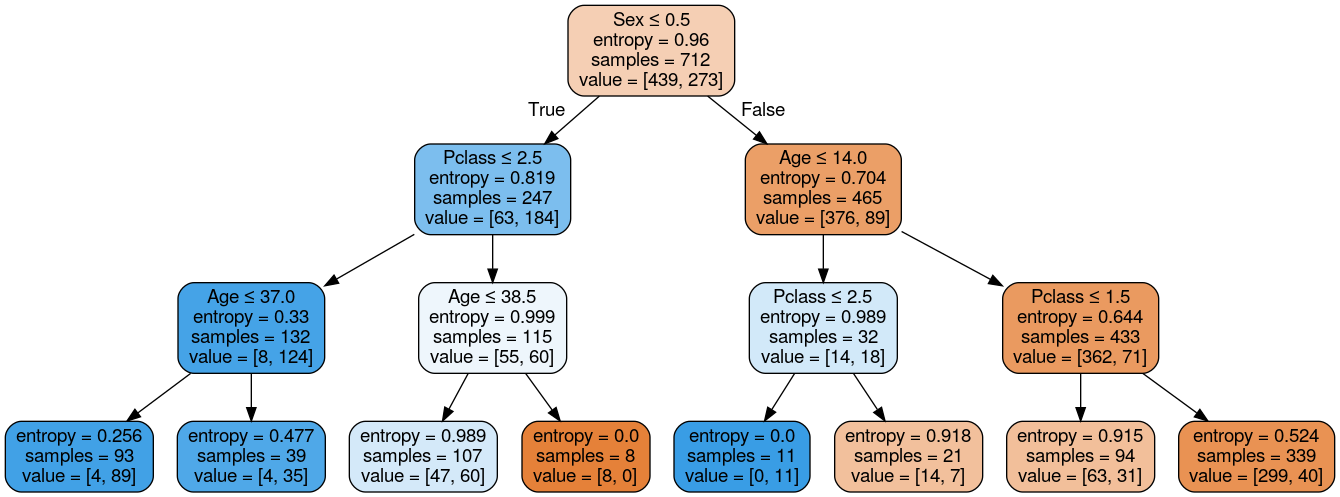

In [30]:
Image(graph.create_png())


In [31]:
from sklearn import metrics

In [32]:
def measure_performance(X,y,clf, show_accuracy=True,
show_classification_report=True, show_confusion_matrix=True):
    y_pred=clf.predict(X)
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y,y_pred),"\n")
    if show_confusion_matrix:
        print("Confussion matrix")
        print(metrics.confusion_matrix(y,y_pred),"\n")

In [33]:
measure_performance(X_train,y_train,clf,show_accuracy=True,show_classification_report=False, show_confusion_matrix=False)

Accuracy:0.813 



In [36]:
measure_performance(X_train,y_train,clf,show_accuracy=True,show_classification_report=True, show_confusion_matrix=True)

Accuracy:0.813 

Classification report
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       439
           1       0.78      0.71      0.75       273

   micro avg       0.81      0.81      0.81       712
   macro avg       0.81      0.79      0.80       712
weighted avg       0.81      0.81      0.81       712
 

Confussion matrix
[[384  55]
 [ 78 195]] 

